# Loading data

In [1]:
models = ['13B', '6.7B']
checkpoints = [23000, 43000, 63000, 83000, 103000, 123000, 143000]
filepath = '/mnt/ssd-1/transformer-memorization'

In [2]:
import os
import pandas as pd
from tqdm.auto import tqdm

tqdm.pandas()

In [3]:
memorization_results = {}
for model in models:
    for checkpoint in tqdm(checkpoints):
        filename = os.path.join(filepath, f'memorization_results_{model}-{checkpoint}.csv')
        memorization_results[f'{model}-{checkpoint}'] = pd.read_csv(filename)

  0%|          | 0/7 [00:00<?, ?it/s]

PermissionError: [Errno 13] Permission denied: '/mnt/ssd-1/transformer-memorization/memorization_results_13B-23000.csv'

In [17]:
for value in memorization_results.values():
    print(len(value))
    break

23560192


In [6]:
from matplotlib import pyplot as plt
import numpy as np

In [11]:
size = 25
params = {
    'legend.fontsize': 'large',
    'figure.figsize': (15,5),
    'axes.labelsize': size,
    'axes.titlesize': size,
    'xtick.labelsize': size*0.75,
    'ytick.labelsize': size*0.75,
    'axes.titlepad': 25,
    'font.family':'sans-serif',
    'font.weight':'bold',
}
plt.rcParams.update(params)

  0%|          | 0/14 [00:00<?, ?it/s]

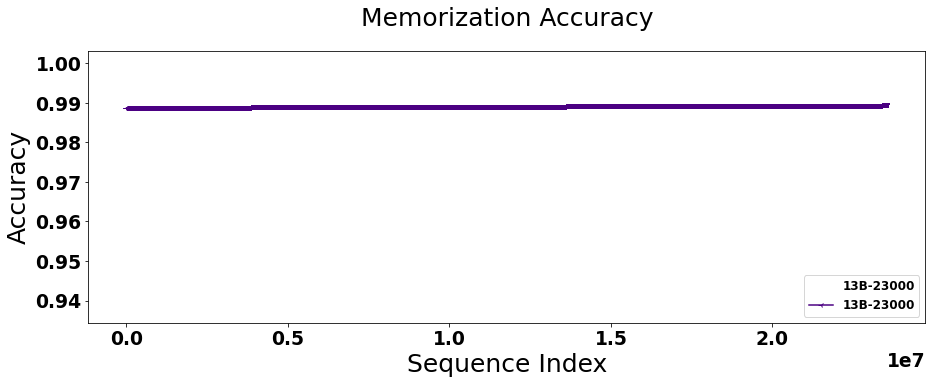

In [12]:
from itertools import cycle
cycol = cycle(['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red'])
from sklearn.metrics import r2_score

for (name, df) in tqdm(memorization_results.items()):
    
    model, checkpoint = name.split('-')
    checkpoint = int(checkpoint)
#     if(model == '13B'): continue
    
    acc_top_value = np.percentile(df['accuracy'],99)
    df_top = df[df['accuracy'] >= acc_top_value]
    plt.scatter(df_top['index'], df_top['accuracy'], color=next(cycol), label=name, alpha=0.0019607)
    a,b = np.polyfit(df_top['index'], df_top['accuracy'],1)
    acc_best_fit = a*df_top['index'] + b
#     print(f'{name} | r^2 = {r2_score(df_top["accuracy"], acc_best_fit)}')
    
#     print(f'{name} | slope: {a:.3} | variance: {a*len(df):.3} | percentage variation: {a*len(df)*100/b:.3}')
    plt.plot(df_top['index'], a*df_top['index'] + b, color=next(cycol), marker='3', label=name)
    break

    
plt.title("Memorization Accuracy")
plt.xlabel("Sequence Index")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

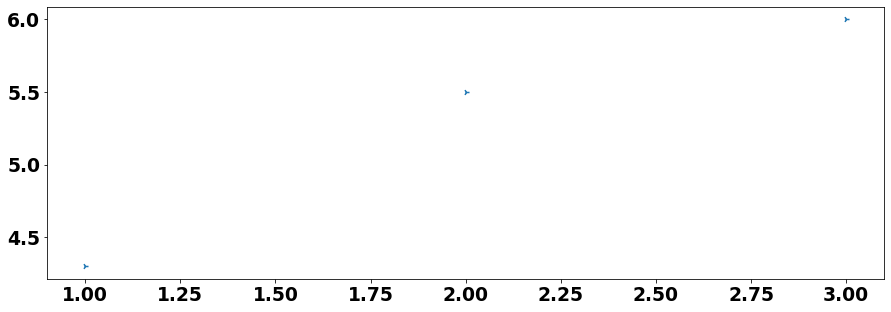

In [46]:
plt.scatter([1,2,3], [4.3,5.5,6.0],marker='4', cmap='viridis')

  0%|          | 0/14 [00:00<?, ?it/s]

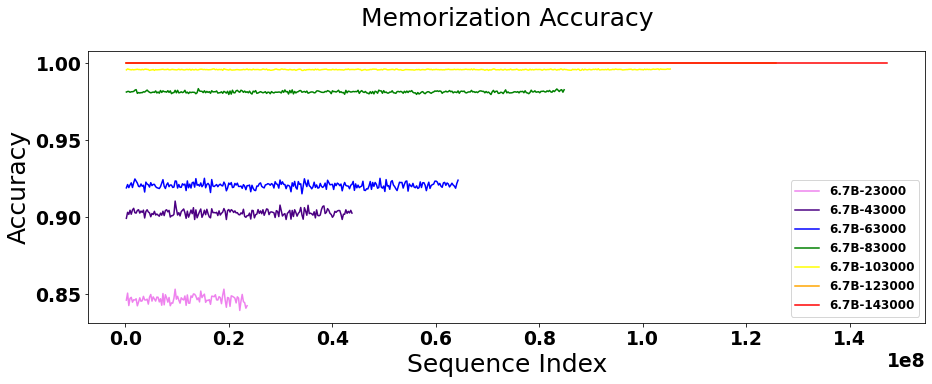

In [38]:
from itertools import cycle
cycol = cycle(['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red'])

for (name, results) in tqdm(memorization_results.items()):
    
    model, checkpoint = name.split('-')
    if(model == '13B'): continue
    
    indicies = []
    acc_means = []
    acc_errs = []
    acc_top_value = np.percentile(results['accuracy'],99)
    df_top = results[results['accuracy'] >= acc_top_value]
    for i in range(235600, len(results),235600):
        result = df_top[((i-235600) <= df_top['index']) & (df_top['index'] < i)]
        indicies.append(result['index'].iloc[-1])
        acc_means.append(result['accuracy'].mean())
        acc_errs.append(result['accuracy'].std()/np.sqrt(len(result)))
    plt.plot(indicies, acc_means, label=name, color=next(cycol))

plt.title("Memorization Accuracy")
plt.xlabel("Sequence Index")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.legend()

In [ ]:
for (name, results) in tqdm(memorization_results.items()):
    top_one_pctl_acc = np.percentile(results['accuracy'], 99)
    res = results.copy()
    res['accuracy'] = res['accuracy'].parallel_apply(lambda x:int(x > top_one_pctl_acc))
    indicies = []
    acc_means = []
    acc_errs = []
    for result in np.array_split(res, 10):
        indicies.append(result.index[-1])
        acc_means.append(result['accuracy'].mean())
        acc_errs.append(result['accuracy'].std()/np.sqrt(len(result)))
    plt.errorbar(indicies, acc_means, yerr = acc_errs, label=name, capsize=5)


In [39]:
for checkpoint in checkpoints:
    name_13B = f'13B-{checkpoint}'
    name_6_7B = f'6.7B-{checkpoint}'
    df = pd.DataFrame()
    df['13B_accuracy'] = memorization_results[name_13B]['accuracy']
    df['6.7B_accuracy'] = memorization_results[name_6_7B]['accuracy']
    print(f'{checkpoint} correlation:')
    print(df.corr())
    
    

23000 correlation:
               13B_accuracy  6.7B_accuracy
13B_accuracy       1.000000       0.000061
6.7B_accuracy      0.000061       1.000000
43000 correlation:
               13B_accuracy  6.7B_accuracy
13B_accuracy       1.000000       0.000253
6.7B_accuracy      0.000253       1.000000
63000 correlation:
               13B_accuracy  6.7B_accuracy
13B_accuracy       1.000000       0.000112
6.7B_accuracy      0.000112       1.000000
83000 correlation:
               13B_accuracy  6.7B_accuracy
13B_accuracy       1.000000       0.000035
6.7B_accuracy      0.000035       1.000000
103000 correlation:
               13B_accuracy  6.7B_accuracy
13B_accuracy        1.00000        0.80597
6.7B_accuracy       0.80597        1.00000
123000 correlation:
               13B_accuracy  6.7B_accuracy
13B_accuracy       1.000000       0.813102
6.7B_accuracy      0.813102       1.000000
143000 correlation:
               13B_accuracy  6.7B_accuracy
13B_accuracy       1.000000       0.815245
6.7B

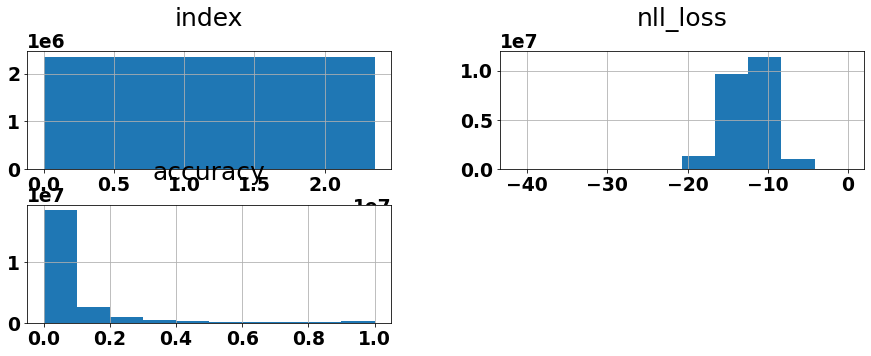

In [40]:
for (name, df) in memorization_results.items():
    df.hist()
    break